# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")


## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames (arquivo na rede)
# users = pd.read_csv('/datasets/megaline_users.csv')
# calls = pd.read_csv('/datasets/megaline_calls.csv')
# messages = pd.read_csv('/datasets/megaline_messages.csv')
# internet = pd.read_csv('/datasets/megaline_internet.csv')
# plans = pd.read_csv('/datasets/megaline_plans.csv')

In [3]:
# Carregue os arquivos em diferentes data frames (arquivo local)
users = pd.read_csv('/Users/andreguilhermerodriguesmac/Library/Mobile Documents/com~apple~CloudDocs/Tripleten - Data Analytics/Sprint 4 - Statistical analysis of data/Projeto/megaline_users.csv')
calls = pd.read_csv('/Users/andreguilhermerodriguesmac/Library/Mobile Documents/com~apple~CloudDocs/Tripleten - Data Analytics/Sprint 4 - Statistical analysis of data/Projeto/megaline_calls.csv')
messages = pd.read_csv('/Users/andreguilhermerodriguesmac/Library/Mobile Documents/com~apple~CloudDocs/Tripleten - Data Analytics/Sprint 4 - Statistical analysis of data/Projeto/megaline_messages.csv')
internet = pd.read_csv('/Users/andreguilhermerodriguesmac/Library/Mobile Documents/com~apple~CloudDocs/Tripleten - Data Analytics/Sprint 4 - Statistical analysis of data/Projeto/megaline_internet.csv')
plans = pd.read_csv('/Users/andreguilhermerodriguesmac/Library/Mobile Documents/com~apple~CloudDocs/Tripleten - Data Analytics/Sprint 4 - Statistical analysis of data/Projeto/megaline_plans.csv')


## Prepare os dados

## Planos

In [4]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprima uma amostra de dados dos planos
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Na tabela planos não existem dados inadequados ou ausentes

## Enriqueça os dados

In [6]:
#criei uma coluna convertendo mb_per_month_included para gb_per_month_included
plans["gb_per_month_included"] = (plans["mb_per_month_included"]/ 1024).astype("int")
plans = plans[['messages_included', 'mb_per_month_included','gb_per_month_included','minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name']]


## Usuários

In [7]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprima uma amostra de dados dos usuários
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Tipo de dados inadequados: 

    users:
        - user_id
        - reg_date
        - churn_date

Dados ausentes:
    
    users:
        - churn_date, 466 linhas, 93% NaN (corrigidos depois)

### Corrija os dados

In [9]:
users["user_id"] = users["user_id"].astype("str")
users["reg_date"] = pd.to_datetime(users["reg_date"], format='%Y-%m-%d')
users["churn_date"] = pd.to_datetime(users["churn_date"], format='%Y-%m-%d')

dados ausentes serao analisados e corrigos mais a frente conforme impacto na analise 

## Chamadas

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprima uma amostra de dados das chamadas
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Tipo de dados inadequados:

calls:
        - user_id
        - call_date 

### Corrija os dados

In [12]:
calls["user_id"] = calls["user_id"].astype("str")
calls["call_date"] = pd.to_datetime(calls["call_date"], format='%Y-%m-%d')

### Enriqueça os dados

In [13]:
#criei coluna pra arrendondar duration para o proximo numero inteiro acima
calls["durantion_rounded"] = np.ceil(calls["duration"]).astype("int")

## Mensagens

In [14]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprima uma amostra dos dados das mensagens
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Dados inadequeados:
messages:
        - user_id
        - message_date

### Corrija os dados

In [16]:
messages["user_id"] = messages["user_id"].astype("str")
messages["message_date"] = pd.to_datetime(messages["message_date"], format='%Y-%m-%d')

## Internet

In [17]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
#  Imprima uma amostra de dados para o tráfego da internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Dados inadequados:
    internet: 
        - user_id
        - session_date

### Corrija os dados

In [19]:
internet["user_id"] = internet["user_id"].astype("str")
internet["session_date"] = pd.to_datetime(internet["session_date"] , format='%Y-%m-%d')

### Enriqueça os dados
Iria criar uma coluna arrendondando mb to gb conforme calculo da empresa para o consumo de internet, porém esse arredondamento acontece por consumo mensal ou seja na cobrança da conta, o data framne ainda não está agrupado para isso. 
Calculo da empresa exemplo: Se alguém usar 1.025 megabytes no mês, a cobrança será de 2 gigabytes. Arrendondamento seria mais cabivel durante futura analise de consumo 

## Estude as condições dos planos

In [20]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
print(plans)

   messages_included  mb_per_month_included  gb_per_month_included  \
0                 50                  15360                     15   
1               1000                  30720                     30   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0               500               20          10             0.03   
1              3000               70           7             0.01   

   usd_per_minute plan_name  
0            0.03      surf  
1            0.01  ultimate  


## Agregue os dados por usuário

In [21]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
calls["call_month"] = calls["call_date"].dt.to_period("M")
calls_per_client = calls.groupby(["user_id", "call_month"])["id"].size()
print(calls_per_client.head())

user_id  call_month
1000     2018-12       16
1001     2018-08       27
         2018-09       49
         2018-10       65
         2018-11       64
Name: id, dtype: int64


In [22]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
calls["call_month"] = calls["call_date"].dt.to_period("M")
minutes_per_client = calls.groupby(["user_id", "call_month"])["durantion_rounded"].sum()
print(minutes_per_client.head())

user_id  call_month
1000     2018-12       124
1001     2018-08       182
         2018-09       315
         2018-10       393
         2018-11       426
Name: durantion_rounded, dtype: int64


In [23]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
messages["message_month"] = messages["message_date"].dt.to_period("M")
messages_per_client = messages.groupby(["user_id", "message_month"])["id"].size()
print(messages_per_client.head())

user_id  message_month
1000     2018-12          11
1001     2018-08          30
         2018-09          44
         2018-10          53
         2018-11          36
Name: id, dtype: int64


In [24]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet["session_month"] = internet["session_date"].dt.to_period("M")
internet_per_client = internet.groupby(["user_id", "session_month"])["mb_used"].sum()
print(internet_per_client.head())


user_id  session_month
1000     2018-12           1901.47
1001     2018-08           6919.15
         2018-09          13314.82
         2018-10          22330.49
         2018-11          18504.30
Name: mb_used, dtype: float64


Usei concat pois poderia haver o risco de algum usuário não ter consumido um dos 3 serviços disponiveis e o dado se perder nos merges 

In [25]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
consumption_concat = pd.concat([calls_per_client, minutes_per_client, messages_per_client, internet_per_client], axis="columns")
consumption_concat.columns = ["count_calls", "total_durantion", "count_messages", "mb_used"]

#criando coluna gb_used de arrendondamento da coluna mb_used per month, conforme calculo de consumo por parte da empresa
consumption_concat["gb_used"] = np.ceil(consumption_concat["mb_used"]/ 1024)
print(consumption_concat.head())

                 count_calls  total_durantion  count_messages   mb_used  \
user_id                                                                   
1000    2018-12         16.0            124.0            11.0   1901.47   
1001    2018-08         27.0            182.0            30.0   6919.15   
        2018-09         49.0            315.0            44.0  13314.82   
        2018-10         65.0            393.0            53.0  22330.49   
        2018-11         64.0            426.0            36.0  18504.30   

                 gb_used  
user_id                   
1000    2018-12      2.0  
1001    2018-08      7.0  
        2018-09     14.0  
        2018-10     22.0  
        2018-11     19.0  


In [26]:
#verificando possiveis ausentes da concatenacao 
print(consumption_concat.isna().sum())

count_calls         35
total_durantion     35
count_messages     487
mb_used             16
gb_used             16
dtype: int64


Nem todos os usuários usam todos os serviços do plano, como podemos ver muitos usuários nao usam o serviço de mensagens, nesse caso vou preencher os valores ausentes com zero já que o produto não foi consumido 

In [27]:
#prenchendo ausentes com 0
consumption_concat = consumption_concat.fillna(0)
consumption_concat[["count_calls", "total_durantion", "count_messages", "gb_used"]] = consumption_concat[["count_calls", "total_durantion", "count_messages", "gb_used"]].astype("int")

#transformando indice em colunas 
consumption_concat.reset_index(inplace=True)

consumption_concat.columns = ["user_id", "date", "count_calls", "total_durantion", "count_messages", "mb_used", "gb_used"]
print(consumption_concat.head())



  user_id     date  count_calls  total_durantion  count_messages   mb_used  \
0    1000  2018-12           16              124              11   1901.47   
1    1001  2018-08           27              182              30   6919.15   
2    1001  2018-09           49              315              44  13314.82   
3    1001  2018-10           65              393              53  22330.49   
4    1001  2018-11           64              426              36  18504.30   

   gb_used  
0        2  
1        7  
2       14  
3       22  
4       19  


In [28]:
# Adicione as informações sobre o plano
#merge com users tables para pegar o plano de cada um  
consumption_total = consumption_concat.merge(users, on = "user_id", how= "left")

#merge com plans table para adicionar o tarifário de cada plano por linha 
consumption_total = consumption_total.merge(plans, left_on= "plan", right_on= "plan_name", how= "left")

In [29]:
#drop colunas que nao me interessam até o momento 
consumption_total = consumption_total.drop(['mb_used','first_name', 'last_name', 'age','reg_date', 'churn_date', 'mb_per_month_included','plan_name'], axis='columns')
print(consumption_total.head())

  user_id     date  count_calls  total_durantion  count_messages  gb_used  \
0    1000  2018-12           16              124              11        2   
1    1001  2018-08           27              182              30        7   
2    1001  2018-09           49              315              44       14   
3    1001  2018-10           65              393              53       22   
4    1001  2018-11           64              426              36       19   

                                    city      plan  messages_included  \
0  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate               1000   
1        Seattle-Tacoma-Bellevue, WA MSA      surf                 50   
2        Seattle-Tacoma-Bellevue, WA MSA      surf                 50   
3        Seattle-Tacoma-Bellevue, WA MSA      surf                 50   
4        Seattle-Tacoma-Bellevue, WA MSA      surf                 50   

   gb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                     3

In [30]:
#criando função com apply() de tratamento de linhas 

def monthly_bill_calculator(row):
    total_durantion = row["total_durantion"]
    count_messages = row["count_messages"]
    gb_used = row["gb_used"]
    messages_included = row["messages_included"]
    gb_per_month_included = row["gb_per_month_included"]
    minutes_included = row["minutes_included"]
    usd_monthly_pay = row["usd_monthly_pay"]
    usd_per_gb = row["usd_per_gb"]
    usd_per_message = row["usd_per_message"]
    usd_per_minute = row["usd_per_minute"]
    
    
    difference_call = minutes_included - total_durantion
    difference_message = messages_included - count_messages
    difference_internet = gb_per_month_included - gb_used

    if difference_call < 0:
        extra_fee_call = (difference_call * usd_per_minute) *-1
    else:
        extra_fee_call = 0 
        
    if difference_message < 0:
        extra_fee_message = (difference_message * usd_per_message) *-1
    else:
        extra_fee_message = 0 
    
    if difference_internet < 0:
        extra_fee_internet = (difference_internet * usd_per_gb) *-1
    else:
        extra_fee_internet = 0 
    
    return usd_monthly_pay + extra_fee_call + extra_fee_message + extra_fee_internet



In [31]:
#teste da função com for loop
row_1 = consumption_total.loc[0]
row_2 = consumption_total.loc[1]
row_3 = consumption_total.loc[2]
row_4 = consumption_total.loc[3]
row_5 = consumption_total.loc[4]

rows = [row_1, row_2, row_3, row_4, row_5]

for row in rows:
    print("Resultado:", monthly_bill_calculator(row))
    

Resultado: 70
Resultado: 20
Resultado: 20
Resultado: 90.09
Resultado: 60


In [32]:
# Calcule a receita mensal para cada usuário
consumption_total["monthly_bill"] = consumption_total.apply(monthly_bill_calculator, axis=1)
print(consumption_total.head())

  user_id     date  count_calls  total_durantion  count_messages  gb_used  \
0    1000  2018-12           16              124              11        2   
1    1001  2018-08           27              182              30        7   
2    1001  2018-09           49              315              44       14   
3    1001  2018-10           65              393              53       22   
4    1001  2018-11           64              426              36       19   

                                    city      plan  messages_included  \
0  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate               1000   
1        Seattle-Tacoma-Bellevue, WA MSA      surf                 50   
2        Seattle-Tacoma-Bellevue, WA MSA      surf                 50   
3        Seattle-Tacoma-Bellevue, WA MSA      surf                 50   
4        Seattle-Tacoma-Bellevue, WA MSA      surf                 50   

   gb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                     3

## Estude o comportamento do usuário

### Chamadas

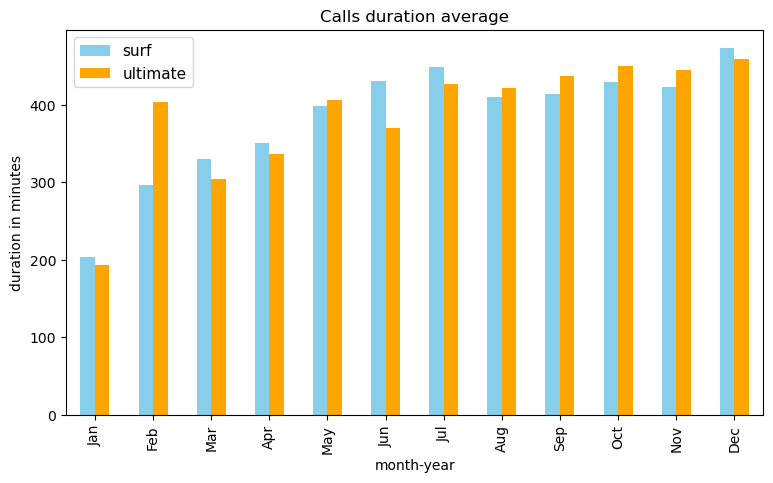

In [33]:
#Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

#Extraindo o mês da coluna data
consumption_total["month"] = consumption_total["date"].dt.month

#Extraindo os nomes dos meses do calendário em vez dos números (1, 2, 3, etc.) usando a biblioteca calendar.
import calendar
consumption_total['month'] = consumption_total['month'].apply(lambda x: calendar.month_abbr[x])

# Definindo a ordem dos meses como uma categoria ordenada
ordered_months = list(calendar.month_abbr)[1:] # [1:] ignora a primeira posição do calendar, que é uma string vazia
consumption_total['month'] = pd.Categorical(consumption_total['month'], categories=ordered_months, ordered=True) 
    #criou categorias de acordo com a lista ordered_months e ordenou igual a lista


#pivot table
pivot_avg_calls = consumption_total.pivot_table(index= "month" , columns= "plan", values= "total_durantion", aggfunc= "mean").astype("int")

#plotando
pivot_avg_calls.plot(kind= "bar", title= "Calls duration average", xlabel= "month-year", ylabel="duration in minutes", color=['skyblue','orange'], figsize= [9,5])
plt.legend(loc='upper left', prop={'size':11})
plt.show()

A duração das chamadas em média são parecidas, havendo apenas um pico no plano ultimate em fevereiro. No geral o numéro de chamadas vem em uma crescente desde de janeiro até dezembro 

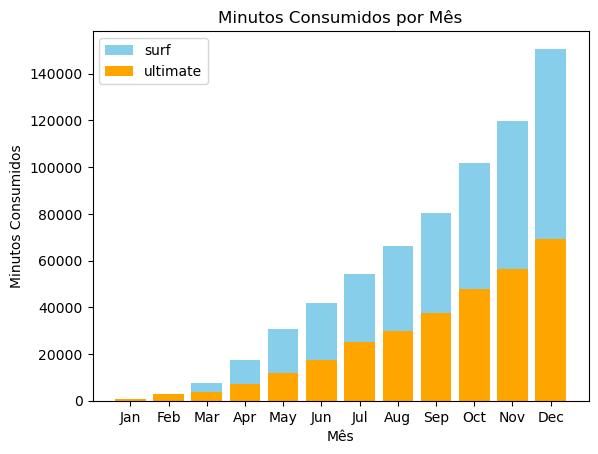

In [34]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

#filtro
consumption_total_surf = consumption_total[consumption_total["plan"] == "surf"]
consumption_total_ultimate = consumption_total[consumption_total["plan"] == "ultimate"]

# Ordenando e somando os minutos consumidos por mês e por plano
consumption_total_surf["month"] = consumption_total_surf["date"].dt.month
consumption_total_surf = consumption_total_surf.sort_values("month")
minutes_per_month_surf = consumption_total_surf.groupby('month')['total_durantion'].sum()

consumption_total_ultimate["month"] = consumption_total_ultimate["date"].dt.month
consumption_total_ultimate = consumption_total_ultimate.sort_values("month")
minutes_per_month_ultimate = consumption_total_ultimate.groupby('month')['total_durantion'].sum()

# Plotando o grafico
plt.bar(minutes_per_month_surf.index, minutes_per_month_surf.values, color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Minutos Consumidos')
plt.title('Minutos Consumidos por Mês')
plt.xticks(minutes_per_month_surf.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.bar(minutes_per_month_ultimate.index, minutes_per_month_ultimate.values, color='orange')
plt.xlabel('Mês')
plt.ylabel('Minutos Consumidos')
plt.title('Minutos Consumidos por Mês')
plt.xticks(minutes_per_month_surf.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(["surf", "ultimate"])
plt.show()


Na verdade somando a duração das chamadas por plano e mês, aparentemente parece que nos dois primeiros meses clientes do plano ultimate fizeram chamadas mais longas que o plano surf, porém a partir de março o cenário é o oposto, com clientes do plano surf se distanciando ainda mais do ultimate. O duração de total de chamadas do plano surf ficam quase mais que o dobro nos ultimos meses do ano chegando a 140 mil minutos 

In [36]:
# Calcule a média, variância e desvio padrão da duração mensal das chamadas

#calculando
mean_calls_surf = round(consumption_total_surf["total_durantion"].mean(),2)
variance_calls_surf = round(np.var(consumption_total_surf["total_durantion"]),2)
stdv_calls_surf = round(np.std(consumption_total_surf["total_durantion"]),2)

mean_calls_ultimate = round(consumption_total_ultimate["total_durantion"].mean(),2)
variance_calls_ultimate = round(np.var(consumption_total_ultimate["total_durantion"]),2)
stdv_calls_ultimate = round(np.std(consumption_total_ultimate["total_durantion"]),2)

print("Média da duração mensal de chamadas plano surf:", mean_calls_surf)
print("Variancia da duração mensal de chamadas plano surf:", variance_calls_surf)
print("Desvio padrão da duração mensal de chamadas plano surf:", stdv_calls_surf)
print()

print("Média da duração mensal de chamadas plano ultimate:", mean_calls_ultimate)
print("Variancia da duração mensal de chamadas plano ultimate:", variance_calls_ultimate)
print("Desvio padrão da duração mensal de chamadas plano ultimate:", stdv_calls_ultimate)

Média da duração mensal de chamadas plano surf: 428.75
Variancia da duração mensal de chamadas plano surf: 54933.33
Desvio padrão da duração mensal de chamadas plano surf: 234.38

Média da duração mensal de chamadas plano ultimate: 430.45
Variancia da duração mensal de chamadas plano ultimate: 57764.13
Desvio padrão da duração mensal de chamadas plano ultimate: 240.34


Plano surf, tem média e desvio padrao parecidos, porém a variância do plano surf é maior que o do plano ultimate. Podemos verificar sobre outliers a seguir, mais a principio o plano ultimate parece seguir uma melhor regularidade durante todo o ano do que plano surf que varia mais.

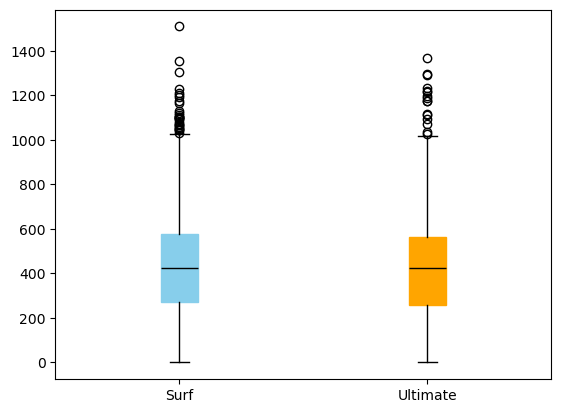

In [37]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
#boxplot total da duracao da chamadas por plano 

# Criando os boxplots com duas cores diferentes
fig, ax = plt.subplots()

consumption_total_surf['total_durantion'].plot(kind='box', ax=ax, color=dict(boxes='skyblue', whiskers='black', medians='black', caps='black'), patch_artist=True, positions=[1])
consumption_total_ultimate['total_durantion'].plot(kind='box', ax=ax, color=dict(boxes='orange', whiskers='black', medians='black', caps='black'), patch_artist=True, positions=[2])

# Ajustando os ticks para o eixo x
ax.set_xticks([1, 2])
ax.set_xticklabels(['Surf', 'Ultimate'])

plt.show()

Mediana dos dois planos são parecidos, porém o plano surf aparentemente tem um numero muito maior de outliers do que plano ultimate 

Segundo a análise dos gráficos, no quesito de chamadas o plano no surf é ligeiramente diferente que o plano ultimate. A duração média de chamadas é parecida durante todo o ano, desvio padrão e mediana também, o que se destaca no plano surf são os numeros de outliers e a variância, aparentemente o plano ultimate tem uma regularidade maior nesses aspecto. Isso pode ser devido a duração de chamadas nos ultimos meses do ano onde o plano surf se destaca

### Mensagens

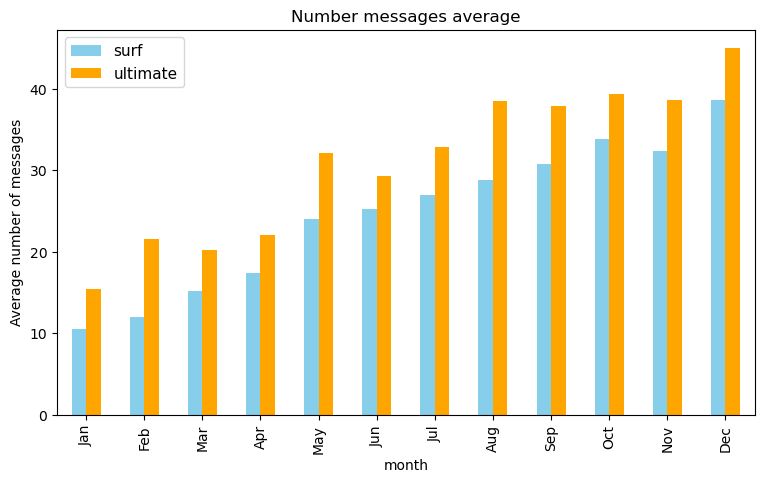

In [38]:
#Compare o numero médio de mensagens a cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

pivot_avg_msg = consumption_total.pivot_table(index= "month" , columns= "plan", values= "count_messages", aggfunc= "mean")

pivot_avg_msg.plot(kind= "bar", title= "Number messages average", xlabel= "month", ylabel="Average number of messages",color=['skyblue','orange'], figsize= [9,5])
plt.legend(loc='upper left', prop={'size':11})
plt.show()

Em média clientes do plano ultimate sempre mandam mais mensagens 

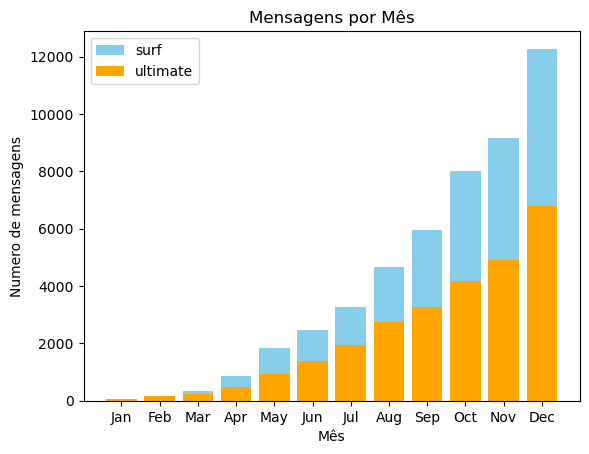

In [39]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

# somando as mensagens consumida por mês e por plano
messages_per_month_surf = consumption_total_surf.groupby('month')['count_messages'].sum()
messages_per_month_ultimate = consumption_total_ultimate.groupby('month')['count_messages'].sum()

# Plotando o grafico
plt.bar(messages_per_month_surf.index, messages_per_month_surf.values, color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Numero de mensagens')
plt.title('Mensagens por Mês')
plt.xticks(messages_per_month_surf.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.bar(messages_per_month_ultimate.index, messages_per_month_ultimate.values, color='orange')
plt.xlabel('Mês')
plt.ylabel('Numero de mensagens')
plt.title('Mensagens por Mês')
plt.xticks(messages_per_month_ultimate.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(["surf", "ultimate"])
plt.show()


Somando o numero de mensagens por plano e mês, aparentemente parece que nos dois primeiros meses clientes do plano ultimate mandam mais mensagens, porém a partir de março o cenário é o oposto, com clientes do plano surf se distanciando ainda mais do ultimate. O numero de mensagens do plano surf ficam quase dobro nos ultimos meses do ano chegando a 12 mil mensagens 

In [40]:
# Calcule a média, variância e desvio padrão do numero de mensagens 
mean_msg_surf = round(consumption_total_surf["count_messages"].mean(),2)
variance_msg_surf = round(np.var(consumption_total_surf["count_messages"]),2)
stdv_msg_surf = round(np.std(consumption_total_surf["count_messages"]),2)

mean_msg_ultimate = round(consumption_total_ultimate["count_messages"].mean(),2)
variance_msg_ultimate = round(np.var(consumption_total_ultimate["count_messages"]),2)
stdv_msg_ultimate = round(np.std(consumption_total_ultimate["count_messages"]),2)

print("Média de mensagens plano surf:", mean_msg_surf)
print("Variancia numero de mensagens plano surf:", variance_msg_surf)
print("Desvio padrão numero de mensagens plano surf:", stdv_msg_surf)
print()

print("Média de mensagens plano ultimate:", mean_msg_ultimate)
print("Variancia numero de mensagens plano ultimate:", variance_msg_ultimate)
print("Desvio padrão numero de mensagens plano ultimate:", stdv_msg_ultimate)



Média de mensagens plano surf: 31.16
Variancia numero de mensagens plano surf: 1126.01
Desvio padrão numero de mensagens plano surf: 33.56

Média de mensagens plano ultimate: 37.55
Variancia numero de mensagens plano ultimate: 1207.08
Desvio padrão numero de mensagens plano ultimate: 34.74


Números bem parecidos para os dois planos no consumo de mensagens, não há diferenças destacaveis em termo de variancia e desvio padrão

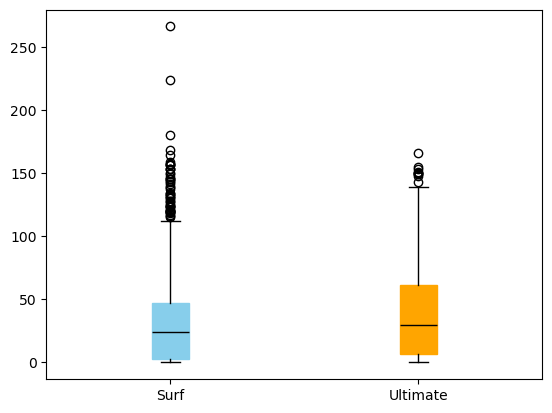

In [41]:
# Faça um diagrama de caixa para visualizar a distribuição das mensagens 

fig, ax = plt.subplots()

consumption_total_surf['count_messages'].plot(kind='box', ax=ax, color=dict(boxes='skyblue', whiskers='black', medians='black', caps='black'), patch_artist=True, positions=[1])
consumption_total_ultimate['count_messages'].plot(kind='box', ax=ax, color=dict(boxes='orange', whiskers='black', medians='black', caps='black'), patch_artist=True, positions=[2])

# Ajustando os ticks para o eixo x
ax.set_xticks([1, 2])
ax.set_xticklabels(['Surf', 'Ultimate'])

plt.show()

Mediana do plano surf um pouco menor que do que o ultimate, porém o plano surf tem um número muito considerável de outliers

Sobre o consumo de mensagens, em média os dois planos consomen um volume parecido de mensagens por mês. Variancia e desvio padrão parecidos também. Mediana do plano surf um pouco menor que o ultimate. Destaque para o número de outliers no plano surf, consideravelmente maior que o plano ultimate. Talvez esses outliers venham do somátorio de mensagens por mês nos ultimos meses do ano onde o plano surf se destaca também no numero de mensagens.

### Internet

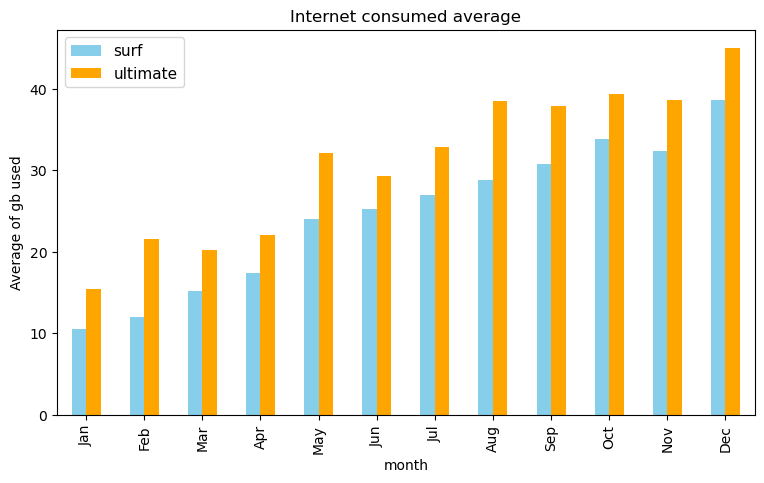

In [42]:
#Compare o numero médio de trafego na internet cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
#criando pivot table 

pivot_avg_net = consumption_total.pivot_table(index= "month" , columns= "plan", values= "gb_used", aggfunc= "mean")

pivot_avg_msg.plot(kind= "bar", title= "Internet consumed average", xlabel= "month", ylabel="Average of gb used",color=['skyblue','orange'], figsize= [9,5])
plt.legend(loc='upper left', prop={'size':11})
plt.show()

Em média plano ultimate consome mais internet por mês que o plano surf durante todo o ano

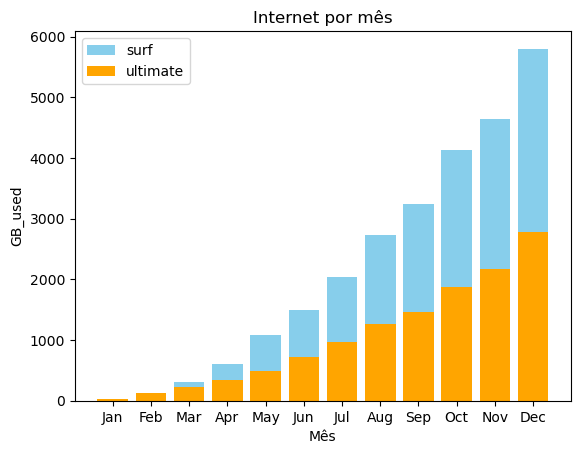

In [43]:
# Compare o número de GB que os usuários de cada plano costumam usar a cada mês

# somando a internet consumida por mês e por plano
internet_per_month_surf = consumption_total_surf.groupby('month')['gb_used'].sum()
internet_per_month_ultimate = consumption_total_ultimate.groupby('month')['gb_used'].sum()

# Plotando o grafico
plt.bar(internet_per_month_surf.index, internet_per_month_surf.values, color='skyblue')
plt.xlabel('Mês')
plt.ylabel('GB_used')
plt.title('Internet por mês')
plt.xticks(internet_per_month_surf.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.bar(internet_per_month_ultimate.index, internet_per_month_ultimate.values, color='orange')
plt.xlabel('Mês')
plt.ylabel('GB_used')
plt.title('Internet por mês')
plt.xticks(internet_per_month_ultimate.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(["surf", "ultimate"])
plt.show()

Conforme o gráfico ao longo do ano clientes do plano surf consomem mais internet que o plano ultimate

In [44]:
# Calcule a média, variância e desvio padrão do uso de internet 

mean_net_surf = round(consumption_total_surf["gb_used"].mean(),2)
variance_net_surf = round(np.var(consumption_total_surf["gb_used"]),2)
stdv_net_surf = round(np.std(consumption_total_surf["gb_used"]),2)

mean_net_ultimate = round(consumption_total_ultimate["gb_used"].mean(),2)
variance_net_ultimate = round(np.var(consumption_total_ultimate["gb_used"]),2)
stdv_net_ultimate = round(np.std(consumption_total_ultimate["gb_used"]),2)

print("Média consumo de internet plano surf:", mean_net_surf)
print("Variancia consumo de internet plano surf:", variance_net_surf)
print("Desvio padrão consumo de internet plano surf:", stdv_net_surf)
print()

print("Média consumo de internet plano ultimate:", mean_net_ultimate)
print("Variancia consumo de internet plano ultimate:", variance_net_ultimate)
print("Desvio padrão consumo de internet plano ultimate:", stdv_net_ultimate)

Média consumo de internet plano surf: 16.67
Variancia consumo de internet plano surf: 61.54
Desvio padrão consumo de internet plano surf: 7.85

Média consumo de internet plano ultimate: 17.31
Variancia consumo de internet plano ultimate: 58.75
Desvio padrão consumo de internet plano ultimate: 7.66


Média total do ultimate 1  gb maior somente, variancia e desvio padrão bem proximos 

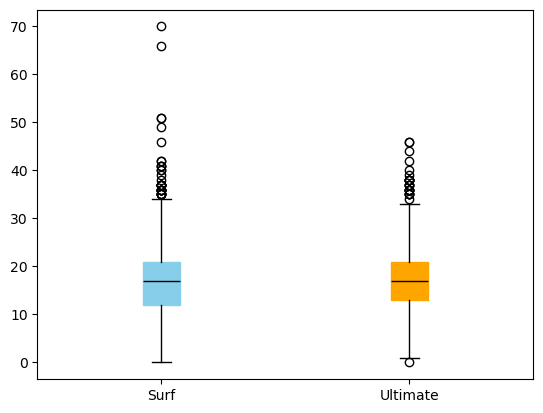

In [45]:
# Faça um diagrama de caixa para visualizar a distribuição do uso de internet 

fig, ax = plt.subplots()

consumption_total_surf['gb_used'].plot(kind='box', ax=ax, color=dict(boxes='skyblue', whiskers='black', medians='black', caps='black'), patch_artist=True, positions=[1])
consumption_total_ultimate['gb_used'].plot(kind='box', ax=ax, color=dict(boxes='orange', whiskers='black', medians='black', caps='black'), patch_artist=True, positions=[2])

# Ajustando os ticks para o eixo x
ax.set_xticks([1, 2])
ax.set_xticklabels(['Surf', 'Ultimate'])

plt.show()

Medianas dos dois planos parecidas, os dois planos tem bastante outliers, porém plano ultimate tem outliers para os dois lados, baixo e alto consumo. Já o surf outliers somente para alto consumo

Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?

Em média plano ultimate consome mais internet que o plano surf, no consumo de internet o plano ultimate não tem tanta regularidade como nos outros quesitos. Há outliers tanto para baixo como para alto consumo. Destancando-se mais para alto consumo. Variancia e desvio padrão dos dois planos parecidos 

## Receita

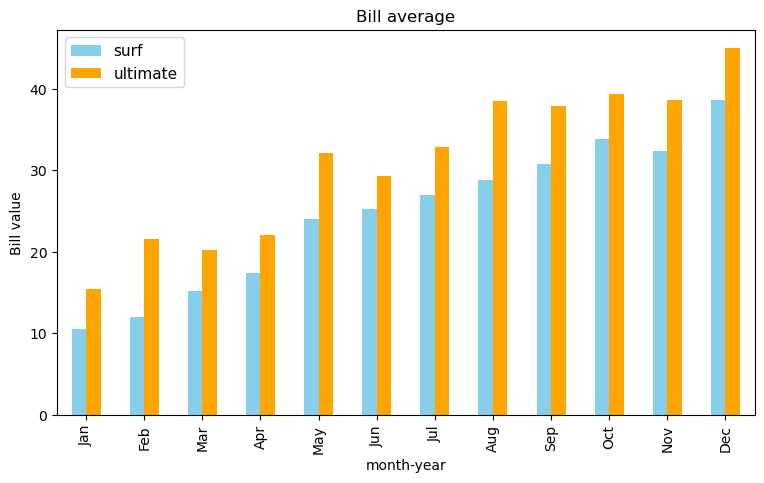

In [46]:
#Compare a média de receita cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
#criando pivot table 

pivot_avg_bill = consumption_total.pivot_table(index= "date" , columns= "plan", values= "monthly_bill", aggfunc= "mean")

pivot_avg_msg.plot(kind= "bar", title= "Bill average", xlabel= "month-year", ylabel="Bill value", color=['skyblue','orange'], figsize= [9,5])
plt.legend(loc='upper left', prop={'size':11})
plt.show()

Média mensal de receita do plano ultimate um pouco maior que o plano surf 

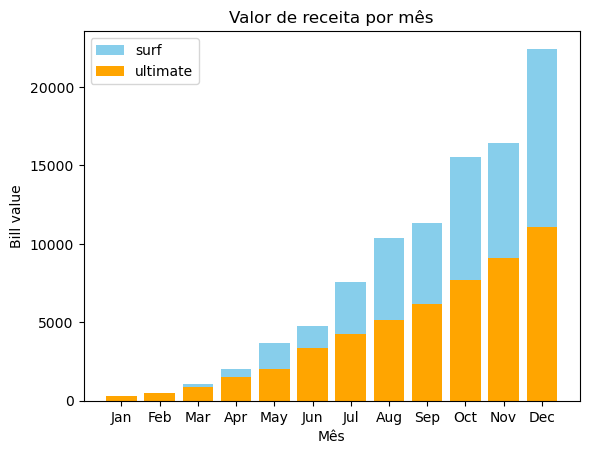

In [47]:
# Compare a receita que os usuários de cada plano costumam pagar a cada mês

# somando o valor da conta por mês e por plano
bill_per_month_surf = consumption_total_surf.groupby('month')["monthly_bill"].sum()
bill_per_month_ultimate = consumption_total_ultimate.groupby('month')["monthly_bill"].sum()

# Plotando o grafico
plt.bar(bill_per_month_surf.index, bill_per_month_surf.values, color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Bill value')
plt.title('Valor de receita por mês')
plt.xticks(bill_per_month_surf.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.bar(bill_per_month_ultimate.index, bill_per_month_ultimate.values, color='orange')
plt.xlabel('Mês')
plt.ylabel('Bill value')
plt.title('Valor de receita por mês')
plt.xticks(bill_per_month_ultimate.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(["surf", "ultimate"])
plt.show()

Receita do plano surf maior que a receita do plano ultimate ao longo do ano, pode ser que os outliers tenha alguma influência nesse resultado

In [48]:
# Calcule a média, variância e desvio padrão da receita

mean_bill_surf = round(consumption_total_surf["monthly_bill"].mean(),2)
variance_bill_surf = round(np.var(consumption_total_surf["monthly_bill"]),2)
stdv_bill_surf = round(np.std(consumption_total_surf["monthly_bill"]),2)

mean_bill_ultimate = round(consumption_total_ultimate["monthly_bill"].mean(),2)
variance_bill_ultimate = round(np.var(consumption_total_ultimate["monthly_bill"]),2)
stdv_bill_ultimate = round(np.std(consumption_total_ultimate["monthly_bill"]),2)

print("Média receita plano surf:", mean_bill_surf)
print("Variancia receita plano surf:", variance_bill_surf)
print("Desvio padrão receita plano surf:", stdv_bill_surf)
print()

print("Média receita plano ultimate:", mean_bill_ultimate)
print("Variancia receita plano ultimate:", variance_bill_ultimate)
print("Desvio padrão receita plano ultimate:", stdv_bill_ultimate)

Média receita plano surf: 60.71
Variancia receita plano surf: 3065.88
Desvio padrão receita plano surf: 55.37

Média receita plano ultimate: 72.31
Variancia receita plano ultimate: 129.67
Desvio padrão receita plano ultimate: 11.39


Média de receita anual do plano ultimate um pouco maior, 10 a mais. Porém variancia e desvio padrão do plano surf muito maior, o que mais uma vez indica a irregularidade do plano surf com uma variação destacavel ao longo do ano.

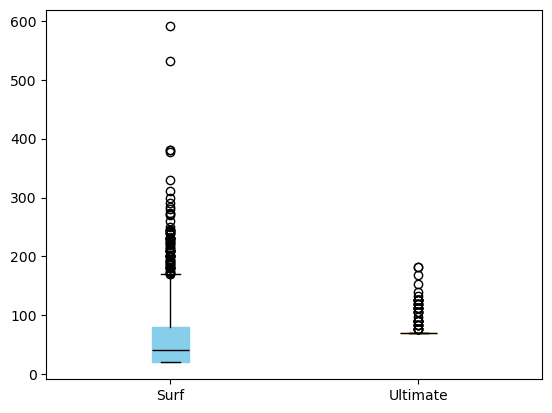

In [49]:
# Faça um diagrama de caixa para visualizar a distribuição da receita

fig, ax = plt.subplots()

consumption_total_surf["monthly_bill"].plot(kind='box', ax=ax, color=dict(boxes='skyblue', whiskers='black', medians='black', caps='black'), patch_artist=True, positions=[1])
consumption_total_ultimate["monthly_bill"].plot(kind='box', ax=ax, color=dict(boxes='orange', whiskers='black', medians='black', caps='black'), patch_artist=True, positions=[2])

# Ajustando os ticks para o eixo x
ax.set_xticks([1, 2])
ax.set_xticklabels(['Surf', 'Ultimate'])

plt.show()

Mediana do ultimate um pouco maior, os dois planos com outliers para receita alta, porém o plano surf tem tanto outliers extremos que faz com o que o boxplot do plano ultimate fique quase invisivel quando colocado no mesmo gráfico lado a lado.

Média mensal de receita do plano ultimate um pouco maior, na média anual ultimate também é superior em 10 dólares, mediana do ultimate um pouco maior porém os dois planos tem outliers com destaque para outliers extremos do plano surf para uma receita alta, exemplos de contas de 500 a 600 doláres mês no plano surf. Plano surf com pouquissima regularidade com variancia e desvio padrão bem alto também  

## Teste hipóteses estatísticas

Testando a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes

In [50]:
# Hipotese nula: a receita média dos dois planos são iguais 
# Hipotese alternativa: a receita média dos dois planos são diferentes 

alpha = .05

results = st.ttest_ind(consumption_total_surf["monthly_bill"], consumption_total_ultimate["monthly_bill"], equal_var=False) 

print("p-value: ", results.pvalue)

if (results.pvalue < alpha): #comparando o valor-p com alpha 
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")
      


p-value:  3.1703905481135738e-15
Rejeitamos a hipótese nula


Hipótese nula rejeitada
Com um valor p menor do que 0.05 há evidências significativas de que há uma diferença estatistica entre as médias da receita dos dois planos

Testando a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões

In [51]:
# Hipotese nula: a receita média dos usuários da área de NY-NJ é igual a receita média das demais regioes  
# Hipotese alternativa: a receita média dos usuários da área de NY-NJ difere da receita média das demais regioes  

#filtrando onde a coluna city contém a string "NY-NJ"
consumption_total_ny_nj = consumption_total[consumption_total["city"].str.contains("NY-NJ", case=False)]
consumption_total_other_regions = consumption_total[~consumption_total["city"].str.contains("NY-NJ", case=False)] 

#ttest para testar se a média da receita difere ou nao 
alpha = .05

results = st.ttest_ind(consumption_total_ny_nj["monthly_bill"], consumption_total_other_regions["monthly_bill"], equal_var=False) 

print("p-value: ", results.pvalue)

if (results.pvalue < alpha): #comparando o valor-p com alpha 
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")


p-value:  0.0335256158853001
Rejeitamos a hipótese nula


Hipótese nula rejeitada
Com um valor p menor do que 0.05 há evidências significativas de que há uma diferença estatistica entre as médias da receita. Neste caso a receita média dos usuários da área de NY-NJ difere da receita média das demais regioes 

## Conclusão geral

A análise sugere que o comportamento dos usuários difere por plano e talvez por região (exemplo: NY_NJ), mas não temos dados suficientes para dizer detalhadamente como. Há outliers nos dois planos em diferentes quesitos com o plano surf tendo uma irregularidade maior tanto no consumo de serviços, como na receita. O que talvez os dados também possam nos indicar é que:

Consumo de chamadas: 
No quesito chamadas o plano no surf é ligeiramente diferente que o plano ultimate. A duração média mensal de chamadas é parecidas porém há outliers no plano surf. O plano ultimate parece ter uma regularidade maior. 

Consumo de mensagens:
Conclusão parecida com chamadasm, mas o número de outliers no plano surf aqui é ainda maior, talvez esses outliers venham do somátorio de mensagens por mês nos ultimos meses do ano onde o plano surf se destaca também no numero de mensagens.

Consumo de internet:
Em média mensal e anual plano ultimate consome mais internet que o plano surf, no consumo de internet o plano ultimate não tem tanta regularidade como nos outros consumos. Há outliers tanto para consumo baixo como para consumo alto. Porém há muito mais para alto consumo. 

Receita: 
Média mensal de receita do plano ultimate um pouco maior, na média anual ultimate também é superior em 10 dólares, mediana do ultimate um pouco maior, porém os dois planos tem outliers com destaque para outliers extremos do plano surf de receita alta, exemplos de contas de 500 a 600 doláres por mês no plano surf. Plano surf com pouquissima regularidade, com variancia e desvio padrão bem altos